<h1>Question 1</h1>

In [1]:
# Importing the libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
# Intensity Transformation
c = np.array([(50, 50), (50, 100), (150, 255),(150, 150)])
t1 = np.linspace(0, c[0, 1], c[0, 0]+1).astype('uint8')
t2 = np.linspace(c[1, 1], c[2, 1], c[2, 0]-c[1, 0]).astype('uint8')
t3 = np.linspace(c[3, 1], 255, 255-c[3, 0]).astype('uint8')
transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(transform))

256


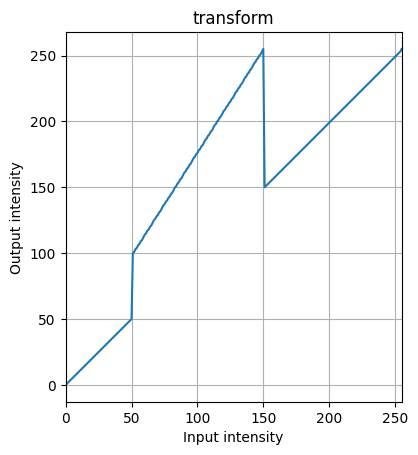

In [3]:
# Plotting the Intensity Transformation
fig, ax = plt.subplots()
ax.plot(transform)
ax.set_title('transform')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.set_aspect('equal')
ax.grid()
plt.show()

In [4]:
# Displaying the Original and Transformed Image
img_org = cv.imread('E:\+Semester 5\Image Processing and Machine Vision - 3\Assignment\Assignment 1\emma.jpg', cv.IMREAD_GRAYSCALE)
if img_org is None: 
    assert False, 'Image could not be read'
cv.namedWindow('original', cv.WINDOW_AUTOSIZE)
cv.imshow('original', img_org)
cv.waitKey(0)
image_transformed = cv.LUT(img_org, transform)
cv.namedWindow('transformed', cv.WINDOW_AUTOSIZE)
cv.imshow('transformed', image_transformed)
cv.waitKey(0)
cv.destroyAllWindows()

<h1>Question 2</h1>

In [5]:
# Visualizing the image
img_org = cv.imread('E:\+Semester 5\Image Processing and Machine Vision - 3\Assignment\Assignment 1\BrainProtonDensitySlice9.png', cv.IMREAD_GRAYSCALE)
if img_org is None: 
    assert False, 'Image could not be read'
cv.namedWindow('image', cv.WINDOW_AUTOSIZE)
cv.imshow('image', img_org)
cv.waitKey(0)
cv.destroyAllWindows()

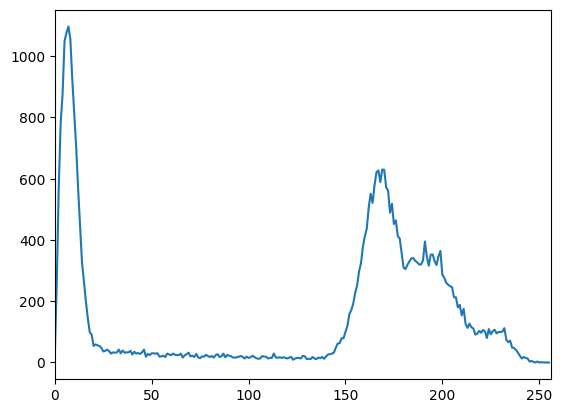

In [6]:
# Visualizing the Histogram
hist = cv.calcHist([img_org],[0],None,[256],[0,256])
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [7]:
# White Matter Accentuation
c = np.array([(75, 75), (75, 0), (175, 0), (175, 255)])
t1 = np.linspace(0, c[0, 1], c[0, 0]+1).astype('uint8')
t2 = np.linspace(c[1, 1], c[2, 1], c[2, 0]-c[1, 0]).astype('uint8')
t3 = np.linspace(c[3 ,1], 255, 255-c[3, 0]).astype('uint8')
white_transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(white_transform))

256


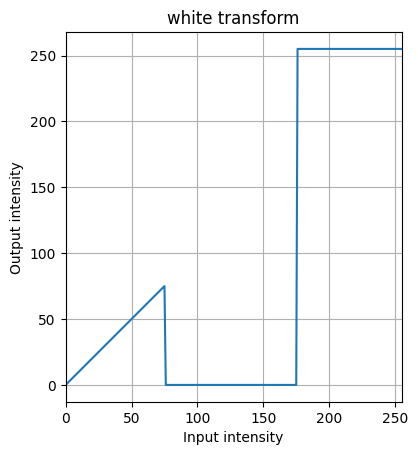

In [8]:
# Plotting the Intensity Transformation
fig, ax = plt.subplots()
ax.plot(white_transform)
ax.set_title('white transform')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.grid
ax.set_aspect('equal')
ax.grid()
plt.show()

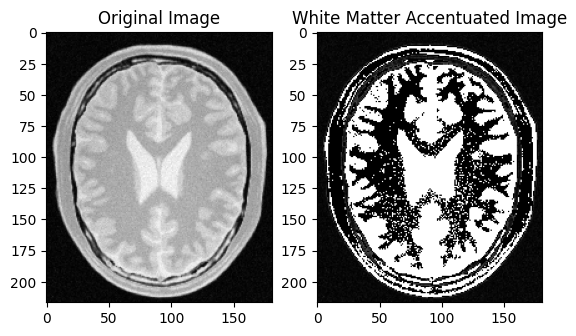

In [9]:
# Displaying the Original and Transformed Image
image_transformed_white = cv.LUT(img_org, white_transform)
fig,ax = plt.subplots(1,2)
ax[0].imshow(img_org, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(image_transformed_white, cmap="gray")
ax[1].set_title("White Matter Accentuated Image")

plt.show()

In [10]:
# Gray Matter Accentuation
c = np.array([(50, 50), (50, 175), (175, 175), (175, 0)])
t1 = np.linspace(0, c[0, 1], c[0, 0]+1).astype('uint8')
t2 = np.linspace(c[1, 1], c[2, 1], c[2, 0]-c[1, 0]).astype('uint8')
t3 = np.linspace(c[3 ,1], 0, 255-c[3, 0]).astype('uint8')
gray_transform = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
print(len(gray_transform))

256


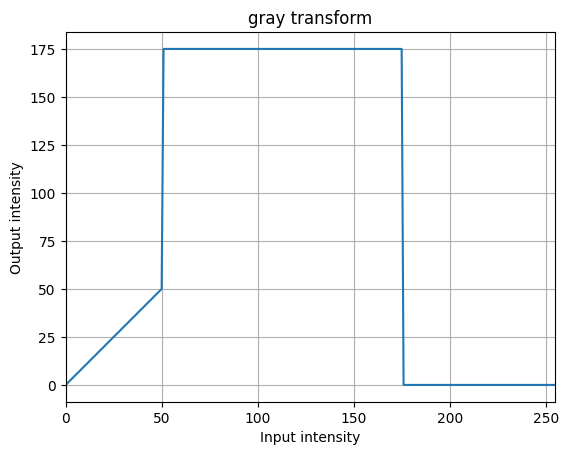

In [11]:
# Plotting the Intensity Transformation
fig, ax = plt.subplots()
ax.plot(gray_transform)
ax.set_title('gray transform')
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0, 255)
ax.grid
ax.set_aspect('equal')
ax.grid()
plt.show()

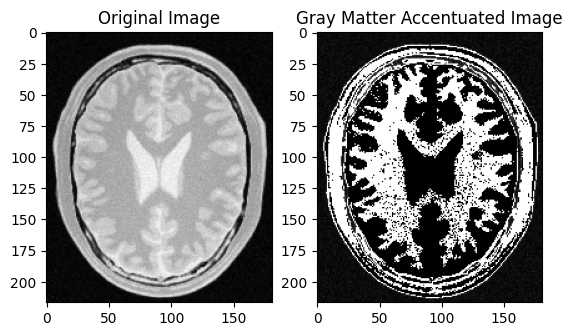

In [12]:
# Displaying the Original and Transformed Image
image_transformed_gray = cv.LUT(img_org, gray_transform)
fig,ax = plt.subplots(1,2)
ax[0].imshow(img_org, cmap="gray")
ax[0].set_title("Original Image")

ax[1].imshow(image_transformed_gray, cmap="gray")
ax[1].set_title("Gray Matter Accentuated Image")

plt.show()

<h1>Question 3</h1>

In [22]:
# Load the image
img_org = cv.imread('E:\+Semester 5\Image Processing and Machine Vision - 3\Assignment\Assignment 1\highlights_and_shadows.jpg')
if img_org is None: 
    assert False, 'Image could not be read'

In [39]:
# Convert the Image to L*a*b* Color Space
img_lab = cv.cvtColor(img_org, cv.COLOR_BGR2LAB)
# Extract the L* Channel
img_l = img_lab[:,:,0]
# Gamma Value
gamma = 0.5
# Apply Gamma Correction to the L* Channel
img_corrected = np.power(img_l/ 255.0, gamma) * 255.0
# Put the Processed L* Channel Back into the Image
img_lab[:,:,0] = img_corrected.astype('uint8')
# Convert the Image Back to RGB
img_gamma_corrected = cv.cvtColor(img_lab, cv.COLOR_LAB2RGB)

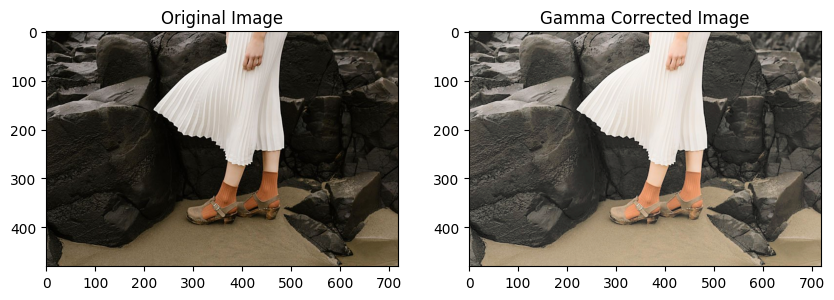

In [40]:
# Displaying the Original and Gamma Corrected Image
fig,ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(cv.cvtColor(img_org, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")

ax[1].imshow(img_gamma_corrected)
ax[1].set_title("Gamma Corrected Image")

plt.show()

Text(0.5, 1.0, 'Histogram of Gamma Corrected Image')

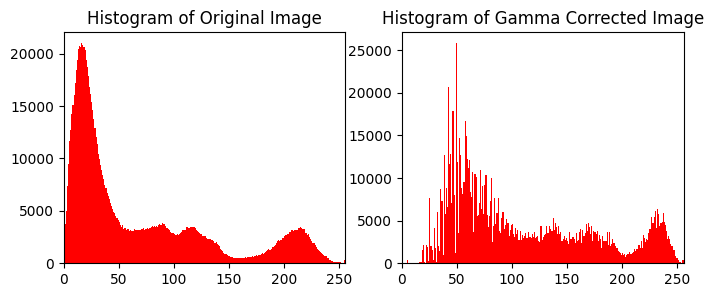

In [46]:
# Histogram of Original Image and Gamma Corrected Imag
fig, ax = plt.subplots(1,2, figsize=(8,3))
ax[0].hist(img_org.flatten(), 256, [0,256], color = 'r')
ax[0].set_xlim([0,256])
# ax[0].legend(('cdf','histogram'), loc = 'upper left')
ax[0].set_title("Histogram of Original Image")

ax[1].hist(img_gamma_corrected.flatten(), 256, [0,256], color = 'r')
ax[1].set_xlim([0,256])
# ax[1].legend(('cdf','histogram'), loc = 'upper left')
ax[1].set_title("Histogram of Gamma Corrected Image")